# Reproduction des résultats d'une publication de ICLR

Conçu par Laurence Liang, le jeudi 7 juin 2018, dans le contexte de reproduire la publication "When is a Convolutional Filter Easy to Learn", https://openreview.net/forum?id=SkA-IE06W des chercheurs **Simon S. Du(CMU), Jason D. Lee (USC), Yuandong Tianm (Facebook AI)**.

### But

J'ai conçu une classe qui utilise un réseau neuronal convolutif (CNN), **iclr_conv** (inclus dans ce dossier GitHub), afin d'étudier l'évolution de l'apprentissage d'un CNN en temps polynomial sous forme de **"relative loss"**.

Je varie l'initialisaiton des filtres du CNN en modifiant le seed pour l'initialisateur **glorot** en utilisant 3 seed différents.

J'utilise la même tâche que les chercheurs, la tâche de **MNIST**. Je maintiens les mêmes fonctions d'activation, l'architecture et la durée de l'entraînement.

### Résumé des résultats obtenus

Pour 2 des 3 initialisateurs utilisés, je constate que la courbe du "loss relative" suit une relation prévisible qui se ressemble à celle de la fonction logarithmique. **Cela complète les observations de la publication d'ICLR.** Toutefois, la courbe du seed=3 se différencie des 2 autres.

Mes résultats reproduits semblent affirmer que l'apprentissage par CNN suit une tendance en temps polynomial, mais qu'on a trouvé un exemple qui oppose ce constat, dont la raison n'est pas connue.

Il reste ainsi à faire davantage d'essais pour observer cette tendance en temps polynomial.

### Importer librairies

J'utilise la libraire Keras pour créer des réseaux de neurones. J'ai conçu un module, iclr_conv (dont le code se retrouve sur ce dossier GitHub), qui sert à identifier des images de l'ensemble MNIST.

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import iclr_conv
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
# Reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# Labels
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### Analyser les données

Je calcule la moyenne des valeurs numériques des données MNIST afin d'en servir pour calculer le "relative loss"

In [8]:
avg_sum = 0
for image in X_test:
    N = len(X_test)
    for container in image:
        sum_of_datapoint = 0.0
        for row in container:
            for value in row:
                sum_of_datapoint += value
    avg = sum_of_datapoint/784
    avg_sum += avg

final_avg = avg_sum/10000


### Lire données

Je lis les données de l'erreur de chaque itération d'un réseau neuronal Keras (ma classe **ConvNet** de mon module **iclr_conv**. Je calcule le "relative loss" par le logarithme du taux d'erreur au carré divisé par le moyen terme des valeurs de l'ensemble **MNIST**.

In [23]:
relative_loss = []
for value in np.load("data/cnn1_val_acc.npy"):
    relative_loss.append(math.log(((1-value)**2)/(final_avg**2), 10))

In [40]:
relative_loss_2 = []
for value in np.load("data/cnn2_val_acc.npy"):
    relative_loss_2.append(math.log(((1-value)**2)/(final_avg**2), 10))

In [25]:
relative_loss_3 = []
for value in np.load("data/cnn3_val_acc.npy"):
    relative_loss_3.append(math.log(((1-value)**2)/(final_avg**2), 10))

## Visualiser les résultats

In [45]:
x_axis = [x for x in range(50)]

plt.plot(x_axis, relative_loss, label='Seed=0', color='black')
plt.plot(x_axis, relative_loss_2, label='Seed=1', color='blue')
plt.plot(x_axis, relative_loss_3, label='Seed=3', color='red')

plt.xlim(0, 49)
plt.ylim(-8, 0)

plt.xlabel("Époque")
plt.ylabel("Relative loss")

plt.title("Observation du \"loss relative\" d'un CNN sur MNIST en modifiant ses filtres")
plt.grid()
plt.legend()
plt.savefig("Résultats/Observation.png", dpi=1000)
plt.close()

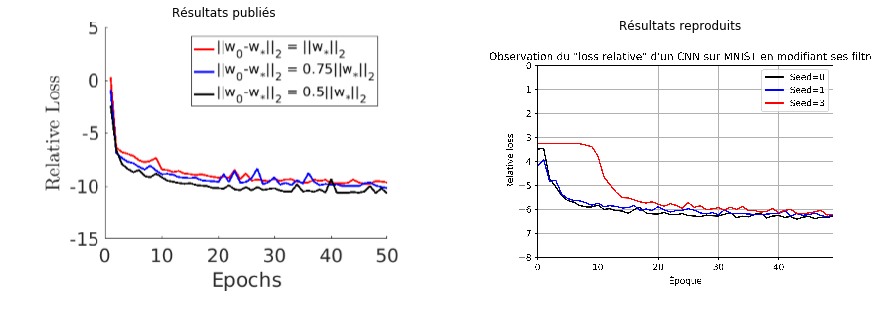

In [44]:
%matplotlib inline

# Visualiser résultats
publication = mpimg.imread('Résultats/Publication.png')
reproduction = mpimg.imread('Résultats/Observation.png')

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(publication)
plt.title("Résultats publiés")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(reproduction)
plt.title("Résultats reproduits")
plt.axis('off')
plt.savefig("Résultats/Comparaison", dpi=500)
plt.show()
plt.close()

### Analyse

On remarque que pour les essais quand le seed vaut 0 ou 1, la courbe suit une relation presque logarithmique. Les valeurs du "loss relative" ne sont pas les mêmes possiblement à cause d'un nombre différent de neurones dans les 2 réseaux, ou à cause d'une initialisation différente des images.

Le cas quand seed vaut 3 contredit les 2 autres courbes. Celui-ci ne semble pas suivre une courbe logarithmique comme les résultats publiés ou les 2 autres courbes.

Un deuxième essai avec davantage de contrôle sur les seed sera nécessaire pour vérifier ce résultat.

### Exemples de réseaux neuronaux

Ici sont des exemples de l'utilisation de mon réseau neuronal de ma classe **ConvNet** du module **iclr_conv**.

In [38]:
cnn2 = iclr_conv.ConvNet(None, None, 1)
cnn2.run_conv_net(X_train, X_test, y_train, y_test, epoch_num=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 59s - loss: 5.7384 - acc: 0.4702 - val_loss: 0.9692 - val_acc: 0.7270
Epoch 2/50
 - 53s - loss: 0.9608 - acc: 0.6871 - val_loss: 0.9012 - val_acc: 0.6318
Epoch 3/50
 - 70s - loss: 0.6978 - acc: 0.7530 - val_loss: 0.4588 - val_acc: 0.8723
Epoch 4/50
 - 65s - loss: 0.4091 - acc: 0.8743 - val_loss: 0.7208 - val_acc: 0.8637
Epoch 5/50
 - 63s - loss: 0.4486 - acc: 0.8764 - val_loss: 0.2644 - val_acc: 0.9301
Epoch 6/50
 - 60s - loss: 0.2608 - acc: 0.9320 - val_loss: 0.2113 - val_acc: 0.9434
Epoch 7/50
 - 72s - loss: 0.2179 - acc: 0.9419 - val_loss: 0.1888 - val_acc: 0.9486
Epoch 8/50
 - 70s - loss: 0.1884 - acc: 0.9481 - val_loss: 0.1823 - val_acc: 0.9494
Epoch 9/50
 - 67s - loss: 0.1778 - acc: 0.9504 - val_loss: 0.1564 - val_acc: 0.9539
Epoch 10/50
 - 60s - loss: 0.1619 - acc: 0.9546 - val_loss: 0.1510 - val_acc: 0.9590
Epoch 11/50
 - 59s - loss: 0.1501 - acc: 0.9574 - val_loss: 0.1597 - val_acc: 0.9544
Epoch 12/50
 - 58s - los

In [6]:
cnn3 = iclr_conv.ConvNet(None, None, 3)
cnn3.run_conv_net(X_train, X_test, y_train, y_test, epoch_num=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 61s - loss: 12.8169 - acc: 0.2035 - val_loss: 12.6789 - val_acc: 0.2125
Epoch 2/50
 - 59s - loss: 12.7230 - acc: 0.2101 - val_loss: 12.6685 - val_acc: 0.2137
Epoch 3/50
 - 59s - loss: 5.5903 - acc: 0.2109 - val_loss: 2.0538 - val_acc: 0.2076
Epoch 4/50
 - 57s - loss: 2.0434 - acc: 0.2096 - val_loss: 2.0264 - val_acc: 0.2131
Epoch 5/50
 - 56s - loss: 2.0259 - acc: 0.2133 - val_loss: 2.0149 - val_acc: 0.2135
Epoch 6/50
 - 57s - loss: 2.0159 - acc: 0.2134 - val_loss: 2.0053 - val_acc: 0.2137
Epoch 7/50
 - 57s - loss: 2.0078 - acc: 0.2142 - val_loss: 2.0080 - val_acc: 0.2118
Epoch 8/50
 - 57s - loss: 2.0023 - acc: 0.2138 - val_loss: 1.9948 - val_acc: 0.2139
Epoch 9/50
 - 57s - loss: 1.8724 - acc: 0.2615 - val_loss: 1.7299 - val_acc: 0.2618
Epoch 10/50
 - 59s - loss: 1.7817 - acc: 0.2940 - val_loss: 1.6830 - val_acc: 0.3157
Epoch 11/50
 - 57s - loss: 1.6131 - acc: 0.3718 - val_loss: 1.3029 - val_acc: 0.5611
Epoch 12/50
 - 57s -

In [ ]:
cnn1 = iclr_conv.ConvNet(None, None, 0)
cnn1.run_conv_net(X_train, X_test, y_train, y_test, epoch_num=50)

### Sauvegarder les données

In [44]:
np.save('data/cnn3_loss',cnn3.loss)
np.save('data/cnn3_val_loss',cnn3.val_loss)
np.save('data/cnn3_acc',cnn3.acc)
np.save('data/cnn3_val_acc',cnn3.val_acc)

In [39]:
np.save('data/cnn2_loss',cnn2.loss)
np.save('data/cnn2_val_loss',cnn2.val_loss)
np.save('data/cnn2_acc',cnn2.acc)
np.save('data/cnn2_val_acc',cnn2.val_acc)